# Természetes nyelvfeldolgozás
# PTE Gépi tanulás III.

## 1. Előadás: gyakorlati feladatok
### 2024. február 21.


In [1]:
!pip install newsapi-python

#Pénzügyi jellegű hírek, szövegek osztályozása

https://newsapi.org/

In [5]:
from newsapi import NewsApiClient
# Initialize the News API client
newsapi = NewsApiClient(api_key='339d82d372a648c6bd7afb4b57e296f7')
try:
    # Fetch news articles related to Tesla
    all_articles = newsapi.get_everything(q='Tesla',
                                          from_param='2024-01-21',
                                          to='2024-02-10',
                                          sort_by='relevancy',
                                          language = 'en')
    # Display articles
    for article in all_articles['articles']:
        print(article['title'], article['url'], article['content'])
except Exception as e:
    print(f"An error occurred: {e}")

Tesla sued by 25 California counties for allegedly mishandling hazardous waste https://consent.yahoo.com/v2/collectConsent?sessionId=1_cc-session_60b31551-702a-4805-842b-bddc6b17e430 Si vous cliquez sur « Tout accepter », nos partenaires (y compris 244 qui font partie du Cadre de transparence et de consentement dIAB) et nous utiliserons également des témoins et vos données person… [+982 chars]
Tesla settles California hazardous waste lawsuit for $1.5 million https://www.engadget.com/tesla-settles-california-hazardous-waste-lawsuit-for-15-million-070513014.html Tesla and the 25 California counties that sued the automaker for mishandling hazardous waste at its facilities around the state have already reached an agreement just a few days after the lawsuit was… [+2353 chars]
The Morning After: A cheaper Tesla, Apple's EV project https://consent.yahoo.com/v2/collectConsent?sessionId=1_cc-session_c910f9f5-bbaf-4579-b0c5-b983aa7c9c2c Si vous cliquez sur « Tout accepter », nos partenaires (y c

#Vizsgáljuk meg mi van az all_articles változóban!

In [62]:
len(all_articles['articles'])

100

#Másoljuk be egy pandas dataframe-be

In [63]:
import pandas as pd

data = all_articles['articles']
df =pd.DataFrame(data)

In [64]:
print(df)

                                               source           author  \
0         {'id': None, 'name': 'Yahoo Entertainment'}       Steve Dent   
1              {'id': 'engadget', 'name': 'Engadget'}    Mariella Moon   
2         {'id': None, 'name': 'Yahoo Entertainment'}        Mat Smith   
3         {'id': None, 'name': 'Yahoo Entertainment'}    Lawrence Bonk   
4                    {'id': 'wired', 'name': 'Wired'}  Aarian Marshall   
..                                                ...              ...   
95                  {'id': None, 'name': 'The Drive'}  Kristin V. Shaw   
96        {'id': None, 'name': 'Yahoo Entertainment'}             None   
97        {'id': None, 'name': 'Yahoo Entertainment'}             None   
98  {'id': 'business-insider', 'name': 'Business I...      Peter Kafka   
99                {'id': None, 'name': 'MarketWatch'}    Claudia Assis   

                                                title  \
0   Tesla sued by 25 California counties for alleg... 

#GPU ellenőrzése

In [68]:
import torch

device = 0 if torch.cuda.is_available() else -1

#A huggingface keretrendszer pipeline segítségével készítsünk egy summarizer-t és a dataframe egy elemén teszteljük le.

In [69]:
from transformers import pipeline

summarizer = pipeline("summarization", device = device)
summarized_text = summarizer(df['content'][10])

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.
Your max_length is set to 142, but your input_length is only 49. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=24)


In [70]:
summarized_text[0]['summary_text']

" A Delaware judge struck down Elon Musks $55.8 billion pay package at Tesla after finding the CEO had extensive ties with the board members who approved his pay deal . The Wall Street Jouroury Joury found that Tesla's CEO had ties with board members ."

#A huggingface keretrendszer pipeline segítségével készítsünk egy sentiment-analysis-t és a dataframe egy elemén teszteljük le. Milyen kimeneteket ad?

In [71]:
classifier = pipeline("sentiment-analysis", device = device)
classifier(summarized_text[0]['summary_text'])

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'label': 'NEGATIVE', 'score': 0.9886279702186584}]

#Iteráljuk végig a dataframe-en az összegzőt!
Prompt: pythonban van egy dataframem aminek a description oszolopa text adatokat tartalmaz. Készíts egy scriptet ami végig ietrál a dataframe descrtiption adatain és egy új summarized nevű oszlopba átmásolja a descriptionben lévő szövegek egy összefoglalóját használd a huggingface summarization funkcióját

In [72]:
df["summarized"] = df["content"].apply(lambda text: summarizer(text, max_length=40)[0]["summary_text"])

Your min_length=56 must be inferior than your max_length=40.
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1158: UserWarning: Unfeasible length constraints: `min_length` (56) is larger than the maximum possible length (40). Generation will stop at the defined maximum length. You should decrease the minimum length and/or increase the maximum length.
  warnings.warn(
Your min_length=56 must be inferior than your max_length=40.
Your min_length=56 must be inferior than your max_length=40.
Your min_length=56 must be inferior than your max_length=40.
Your min_length=56 must be inferior than your max_length=40.
Your min_length=56 must be inferior than your max_length=40.
Your min_length=56 must be inferior than your max_length=40.
Your min_length=56 must be inferior than your max_length=40.
Your min_length=56 must be inferior than your max_length=40.
/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1123: UserWarning: You seem to be using the pi

#Néha hibázik, NAN elemek lehetnek az dataframeben javítsuk ki
Prompt: df["summarized"] = df["description"].apply(lambda text: summarizer(text, max_length=120)[0]["summary_text"]) Egészítsd ki ezt a kódot, hogy amennyiben NAN a visszatérő érték akkor üres sztringet adjon vissza

In [73]:
df["summarized"] = df["content"].apply(lambda text: summarizer(text, max_length=40)[0]["summary_text"] if not pd.isnull(text) else "")

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1123: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
Your min_length=56 must be inferior than your max_length=40.
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1158: UserWarning: Unfeasible length constraints: `min_length` (56) is larger than the maximum possible length (40). Generation will stop at the defined maximum length. You should decrease the minimum length and/or increase the maximum length.
  warnings.warn(
Your min_length=56 must be inferior than your max_length=40.
Your min_length=56 must be inferior than your max_length=40.
Your min_length=56 must be inferior than your max_length=40.
Your min_length=56 must be inferior than your max_length=40.
Your min_length=56 must be inferior than your max_length=40.
Your min_length=56 must be inferior than your max_length=40.
Your min_length=56 must

#Ellenőrízzük le a dataframe-et

In [74]:
df

,source,author,title,description,url,urlToImage,publishedAt,content,summarized
0,"{'id': None, 'name': 'Yahoo Entertainment'}",Steve Dent,Tesla sued by 25 California counties for alleg...,Tesla is facing a lawsuit from 25 California c...,https://consent.yahoo.com/v2/collectConsent?se...,None,2024-02-01T08:20:34Z,"Si vous cliquez sur « Tout accepter », nos par...",244 partenaires (y compris 244 who font parti...
1,"{'id': 'engadget', 'name': 'Engadget'}",Mariella Moon,Tesla settles California hazardous waste lawsu...,Tesla and the 25 California counties that sued...,https://www.engadget.com/tesla-settles-califor...,https://s.yimg.com/ny/api/res/1.2/nlN6wIaA6I61...,2024-02-02T07:05:13Z,Tesla and the 25 California counties that sued...,Tesla and the 25 California counties that sue...
2,"{'id': None, 'name': 'Yahoo Entertainment'}",Mat Smith,"The Morning After: A cheaper Tesla, Apple's EV...","Sorry to interrupt your Saturday, but The Poke...",https://consent.yahoo.com/v2/collectConsent?se...,None,2024-01-27T14:00:08Z,"Si vous cliquez sur « Tout accepter », nos par...",244 partenaires (y compris 244 who font parti...
3,"{'id': None, 'name': 'Yahoo Entertainment'}",Lawrence Bonk,"Tesla recalls 200,000 vehicles because of a fa...","Tesla is recalling 200,000 vehicles in the US ...",https://consent.yahoo.com/v2/collectConsent?se...,None,2024-01-26T15:33:02Z,"Si vous cliquez sur « Tout accepter », nos par...",244 partenaires (y compris 244 who font parti...
4,"{'id': 'wired', 'name': 'Wired'}",Aarian Marshall,Ford Is Giving Away Free Tesla Charger Convert...,Mustang Mach-E and F-150 Lightning pickup owne...,https://www.wired.com/story/ford-is-giving-awa...,https://media.wired.com/photos/65ba8ab45616ce5...,2024-01-31T20:05:45Z,Ford CEO Jim Farley hopped on Elon Musks X tod...,Ford will be giving away adapters so that its...
...,...,...,...,...,...,...,...,...,...
95,"{'id': None, 'name': 'The Drive'}",Kristin V. Shaw,Ford EV Drivers Will Get Free Tesla Supercharg...,CEO Jim Farley confirmed the plan to send the ...,https://www.thedrive.com/news/ford-ev-drivers-...,https://www.thedrive.com/uploads/2024/02/02/1-...,2024-02-07T17:46:01Z,"In May of last year, Ford CEO Jim Farley made ...",Ford CEO Jim Farley made a surprise announcem...
96,"{'id': None, 'name': 'Yahoo Entertainment'}",None,Nikola Tesla Lived 24 Years Longer Than He Sho...,None,https://consent.yahoo.com/v2/collectConsent?se...,None,2024-02-01T14:00:00Z,"Si vous cliquez sur « Tout accepter », nos par...",244 partenaires (y compris 244 who font parti...
97,"{'id': None, 'name': 'Yahoo Entertainment'}",None,Leaked Tesla pay data: How much Elon Musk's fa...,None,https://consent.yahoo.com/v2/collectConsent?se...,None,2024-02-08T09:30:01Z,"Si vous cliquez sur « Tout accepter », nos par...","Si vous cliquez sur 'Tout accepter', vous par..."
98,"{'id': 'business-insider', 'name': 'Business I...",Peter Kafka,Meta warns investors that Mark Zuckerberg's lo...,Meta CEO Mark Zuckerberg got hurt last year tr...,https://www.businessinsider.com/meta-risk-fact...,https://i.insider.com/65bd26cf7a3d271488773266...,2024-02-02T17:34:05Z,"Mark Zuckerberg with UFC legends, Israel Adesa...",Mark Zuckerberg loves extreme sports and like...


#Iteráljuk végig a dataframe-en a hangulatelemzőt!

In [75]:
df["cls_score"] = df["summarized"].apply(lambda text: classifier(text, max_length=120)[0]["score"] if not pd.isnull(text) else "")


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1123: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


In [76]:
df["cls_label"] = df["summarized"].apply(lambda text: classifier(text, max_length=120)[0]["label"] if not pd.isnull(text) else "")

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1123: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


#Amennyiben a hangulat negatív szorozzuk be a score-t -1-el
Prompt: van egy dataframe amiben két oszlop van label és score, amennyiben a label értéke negatív a score értékét szorozd meg -1-el

In [77]:
df.loc[df["cls_label"] == "NEGATIVE", "cls_score"] *= -1

In [78]:
df

,source,author,title,description,url,urlToImage,publishedAt,content,summarized,cls_score,cls_label
0,"{'id': None, 'name': 'Yahoo Entertainment'}",Steve Dent,Tesla sued by 25 California counties for alleg...,Tesla is facing a lawsuit from 25 California c...,https://consent.yahoo.com/v2/collectConsent?se...,None,2024-02-01T08:20:34Z,"Si vous cliquez sur « Tout accepter », nos par...",244 partenaires (y compris 244 who font parti...,-0.985781,NEGATIVE
1,"{'id': 'engadget', 'name': 'Engadget'}",Mariella Moon,Tesla settles California hazardous waste lawsu...,Tesla and the 25 California counties that sued...,https://www.engadget.com/tesla-settles-califor...,https://s.yimg.com/ny/api/res/1.2/nlN6wIaA6I61...,2024-02-02T07:05:13Z,Tesla and the 25 California counties that sued...,Tesla and the 25 California counties that sue...,-0.990271,NEGATIVE
2,"{'id': None, 'name': 'Yahoo Entertainment'}",Mat Smith,"The Morning After: A cheaper Tesla, Apple's EV...","Sorry to interrupt your Saturday, but The Poke...",https://consent.yahoo.com/v2/collectConsent?se...,None,2024-01-27T14:00:08Z,"Si vous cliquez sur « Tout accepter », nos par...",244 partenaires (y compris 244 who font parti...,-0.985781,NEGATIVE
3,"{'id': None, 'name': 'Yahoo Entertainment'}",Lawrence Bonk,"Tesla recalls 200,000 vehicles because of a fa...","Tesla is recalling 200,000 vehicles in the US ...",https://consent.yahoo.com/v2/collectConsent?se...,None,2024-01-26T15:33:02Z,"Si vous cliquez sur « Tout accepter », nos par...",244 partenaires (y compris 244 who font parti...,-0.985781,NEGATIVE
4,"{'id': 'wired', 'name': 'Wired'}",Aarian Marshall,Ford Is Giving Away Free Tesla Charger Convert...,Mustang Mach-E and F-150 Lightning pickup owne...,https://www.wired.com/story/ford-is-giving-awa...,https://media.wired.com/photos/65ba8ab45616ce5...,2024-01-31T20:05:45Z,Ford CEO Jim Farley hopped on Elon Musks X tod...,Ford will be giving away adapters so that its...,-0.852994,NEGATIVE
...,...,...,...,...,...,...,...,...,...,...,...
95,"{'id': None, 'name': 'The Drive'}",Kristin V. Shaw,Ford EV Drivers Will Get Free Tesla Supercharg...,CEO Jim Farley confirmed the plan to send the ...,https://www.thedrive.com/news/ford-ev-drivers-...,https://www.thedrive.com/uploads/2024/02/02/1-...,2024-02-07T17:46:01Z,"In May of last year, Ford CEO Jim Farley made ...",Ford CEO Jim Farley made a surprise announcem...,0.901030,POSITIVE
96,"{'id': None, 'name': 'Yahoo Entertainment'}",None,Nikola Tesla Lived 24 Years Longer Than He Sho...,None,https://consent.yahoo.com/v2/collectConsent?se...,None,2024-02-01T14:00:00Z,"Si vous cliquez sur « Tout accepter », nos par...",244 partenaires (y compris 244 who font parti...,-0.985781,NEGATIVE
97,"{'id': None, 'name': 'Yahoo Entertainment'}",None,Leaked Tesla pay data: How much Elon Musk's fa...,None,https://consent.yahoo.com/v2/collectConsent?se...,None,2024-02-08T09:30:01Z,"Si vous cliquez sur « Tout accepter », nos par...","Si vous cliquez sur 'Tout accepter', vous par...",-0.887868,NEGATIVE
98,"{'id': 'business-insider', 'name': 'Business I...",Peter Kafka,Meta warns investors that Mark Zuckerberg's lo...,Meta CEO Mark Zuckerberg got hurt last year tr...,https://www.businessinsider.com/meta-risk-fact...,https://i.insider.com/65bd26cf7a3d271488773266...,2024-02-02T17:34:05Z,"Mark Zuckerberg with UFC legends, Israel Adesa...",Mark Zuckerberg loves extreme sports and like...,0.997701,POSITIVE


#Milyen volt az elmúlt időszak piaci hangulata?

In [79]:
df.cls_score.mean()

-0.6149035561084747

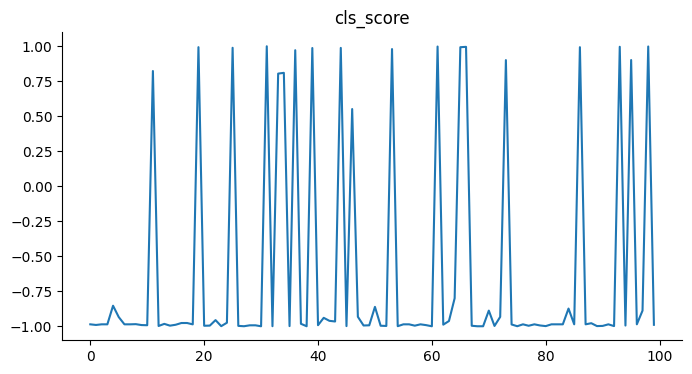

In [80]:
from matplotlib import pyplot as plt
df['cls_score'].plot(kind='line', figsize=(8, 4), title='cls_score')
plt.gca().spines[['top', 'right']].set_visible(False)

<ipython-input-81-ed993777dc63>:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(df, x='publishedAt', y='cls_label', palette='Dark2')


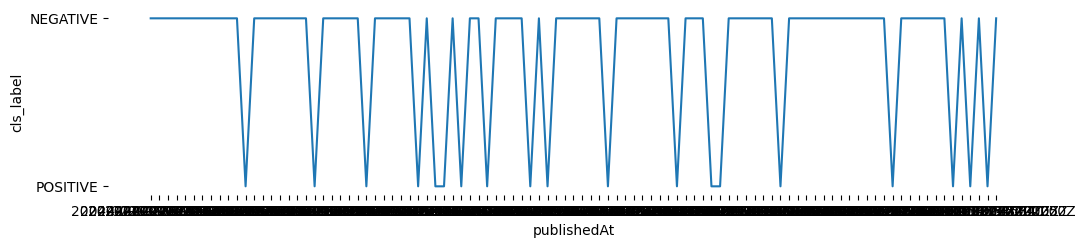

In [81]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['cls_label'].unique()))
plt.figure(figsize=figsize)
sns.lineplot(df, x='publishedAt', y='cls_label', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

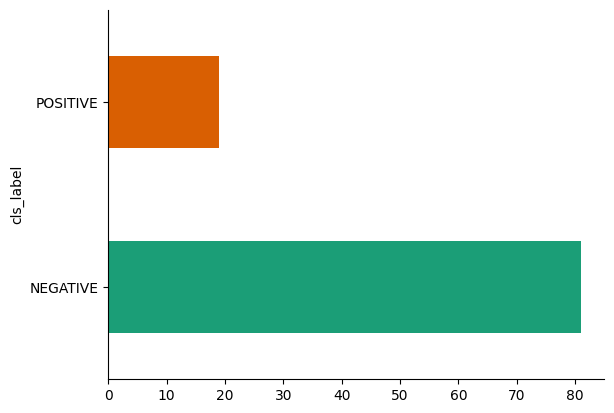

In [82]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('cls_label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)